In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df_train = pd.read_csv("../data/data_train.csv")  # Train dataset
df_test = pd.read_csv("../data/data_test.csv")    # Test dataset

In [79]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [80]:
print(f"Shape\n{df_train.shape}")

Shape
(202944, 25)


In [81]:
print(f"\nNull values count\n{df_train.isna().sum()}")


Null values count
Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64


In [82]:
print(f"Duplicated rows: {df_train.duplicated().sum()}")
print(f"Duplicated patients: {df_train.duplicated(subset='Id').sum()}")

Duplicated rows: 0
Duplicated patients: 0


In [83]:
df_train.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [84]:
df_train.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [85]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    50736 non-null  int64  
 1   HighBP                50736 non-null  int64  
 2   HighChol              50736 non-null  int64  
 3   CholCheck             50736 non-null  int64  
 4   BMI                   50736 non-null  int64  
 5   Smoker                50736 non-null  int64  
 6   Stroke                50736 non-null  int64  
 7   HeartDiseaseorAttack  50736 non-null  int64  
 8   PhysActivity          50736 non-null  int64  
 9   Fruits                50736 non-null  int64  
 10  Veggies               50736 non-null  int64  
 11  HvyAlcoholConsump     50736 non-null  int64  
 12  AnyHealthcare         50736 non-null  int64  
 13  NoDocbcCost           50736 non-null  int64  
 14  GenHlth               50736 non-null  int64  
 15  MentHlth           

In [86]:
print(f"Shape\n{df_test.shape}")

Shape
(50736, 25)


In [87]:
print(f"\nNull values count\n{df_test.isna().sum()}")


Null values count
Id                          0
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
ExtraMedTest                0
ExtraAlcoholTest            0
Status                  50736
dtype: int64


In [88]:
print(f"Duplicated rows: {df_test.duplicated().sum()}")
print(f"Duplicated patients: {df_test.duplicated(subset='Id').sum()}")

Duplicated rows: 0
Duplicated patients: 0


Our dataseet has no null value or duplicates 

In [89]:
df_test.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,202944,1,1,1,30,1,0,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
1,202945,0,0,1,27,1,0,0,0,0,...,0,30,1,1,13,2,5,28,-145,NaN
2,202946,0,0,1,21,0,0,0,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
3,202947,0,0,1,24,1,0,0,1,1,...,0,30,0,0,9,6,7,0,0,NaN
4,202948,1,0,1,34,0,0,0,1,1,...,0,1,1,0,11,4,7,-73,-63,NaN


In [90]:
df_test.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,...,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,0.0
mean,228311.500000,0.430207,0.423230,0.962729,28.392522,0.445305,0.039479,0.093366,0.757509,0.629789,...,3.135978,4.184583,0.166292,0.443531,8.010801,5.051187,6.046811,-10.972189,-11.429202,NaN
std,14646.365966,0.495110,0.494076,0.189428,6.592550,0.497004,0.194733,0.290947,0.428594,0.482866,...,7.354835,8.642537,0.372346,0.496806,3.064743,0.986477,2.075180,74.323238,74.525657,NaN
min,202944.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,NaN
25%,215627.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-57.000000,-58.000000,NaN
50%,228311.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,NaN
75%,240995.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,33.000000,32.000000,NaN
max,253679.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,NaN


### Description for the dataset can be found [here](../data/code_book.txt)



In [91]:
# Drop 'Id' column based on requirements
df_train = df_train.drop(columns=['Id'])
df_test = df_test.drop(columns=['Id', 'Status'])

Description for plots: 

- Train dataset: skyblue color
- Test dataset: crimson color


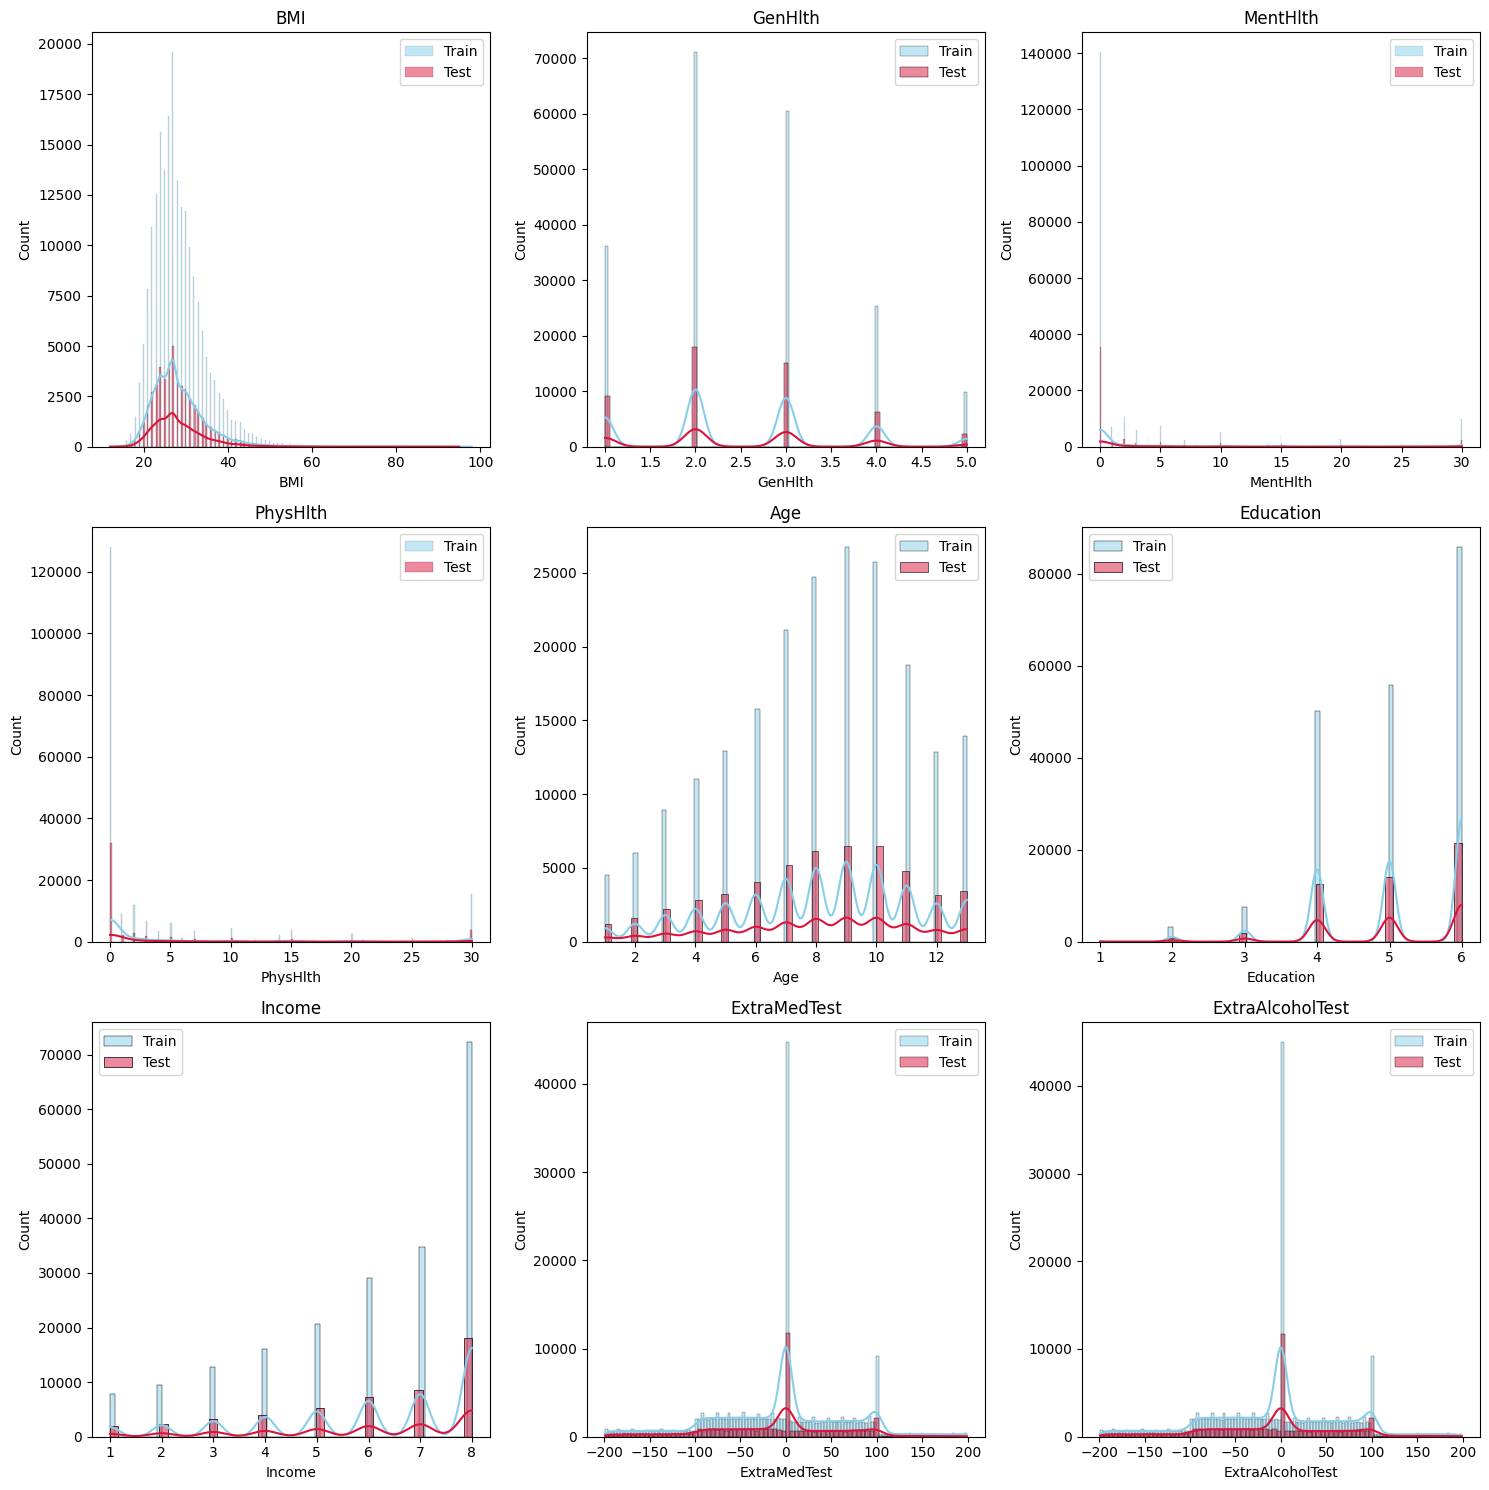

In [92]:
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income',
                      'ExtraMedTest', 'ExtraAlcoholTest']

# Calculate the number of rows needed for subplots
n_rows = len(numerical_features) // 3
if len(numerical_features) % 3:
    n_rows += 1

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# Flatten the axes array and remove extra subplots
axes = axes.flatten()
for ax in axes[len(numerical_features):]:
    fig.delaxes(ax)

for i, feature in enumerate(numerical_features):
    # Plot data for train dataset
    sns.histplot(df_train[feature], kde=True, color="skyblue", label="Train", ax=axes[i])
    axes[i].set_title(feature)

    # Plot data for test dataset
    sns.histplot(df_test[feature], kde=True, color="crimson", label="Test", ax=axes[i])
    axes[i].legend()

plt.tight_layout()
plt.show()

fig.savefig('../images/numerical_columns_distribution.png')


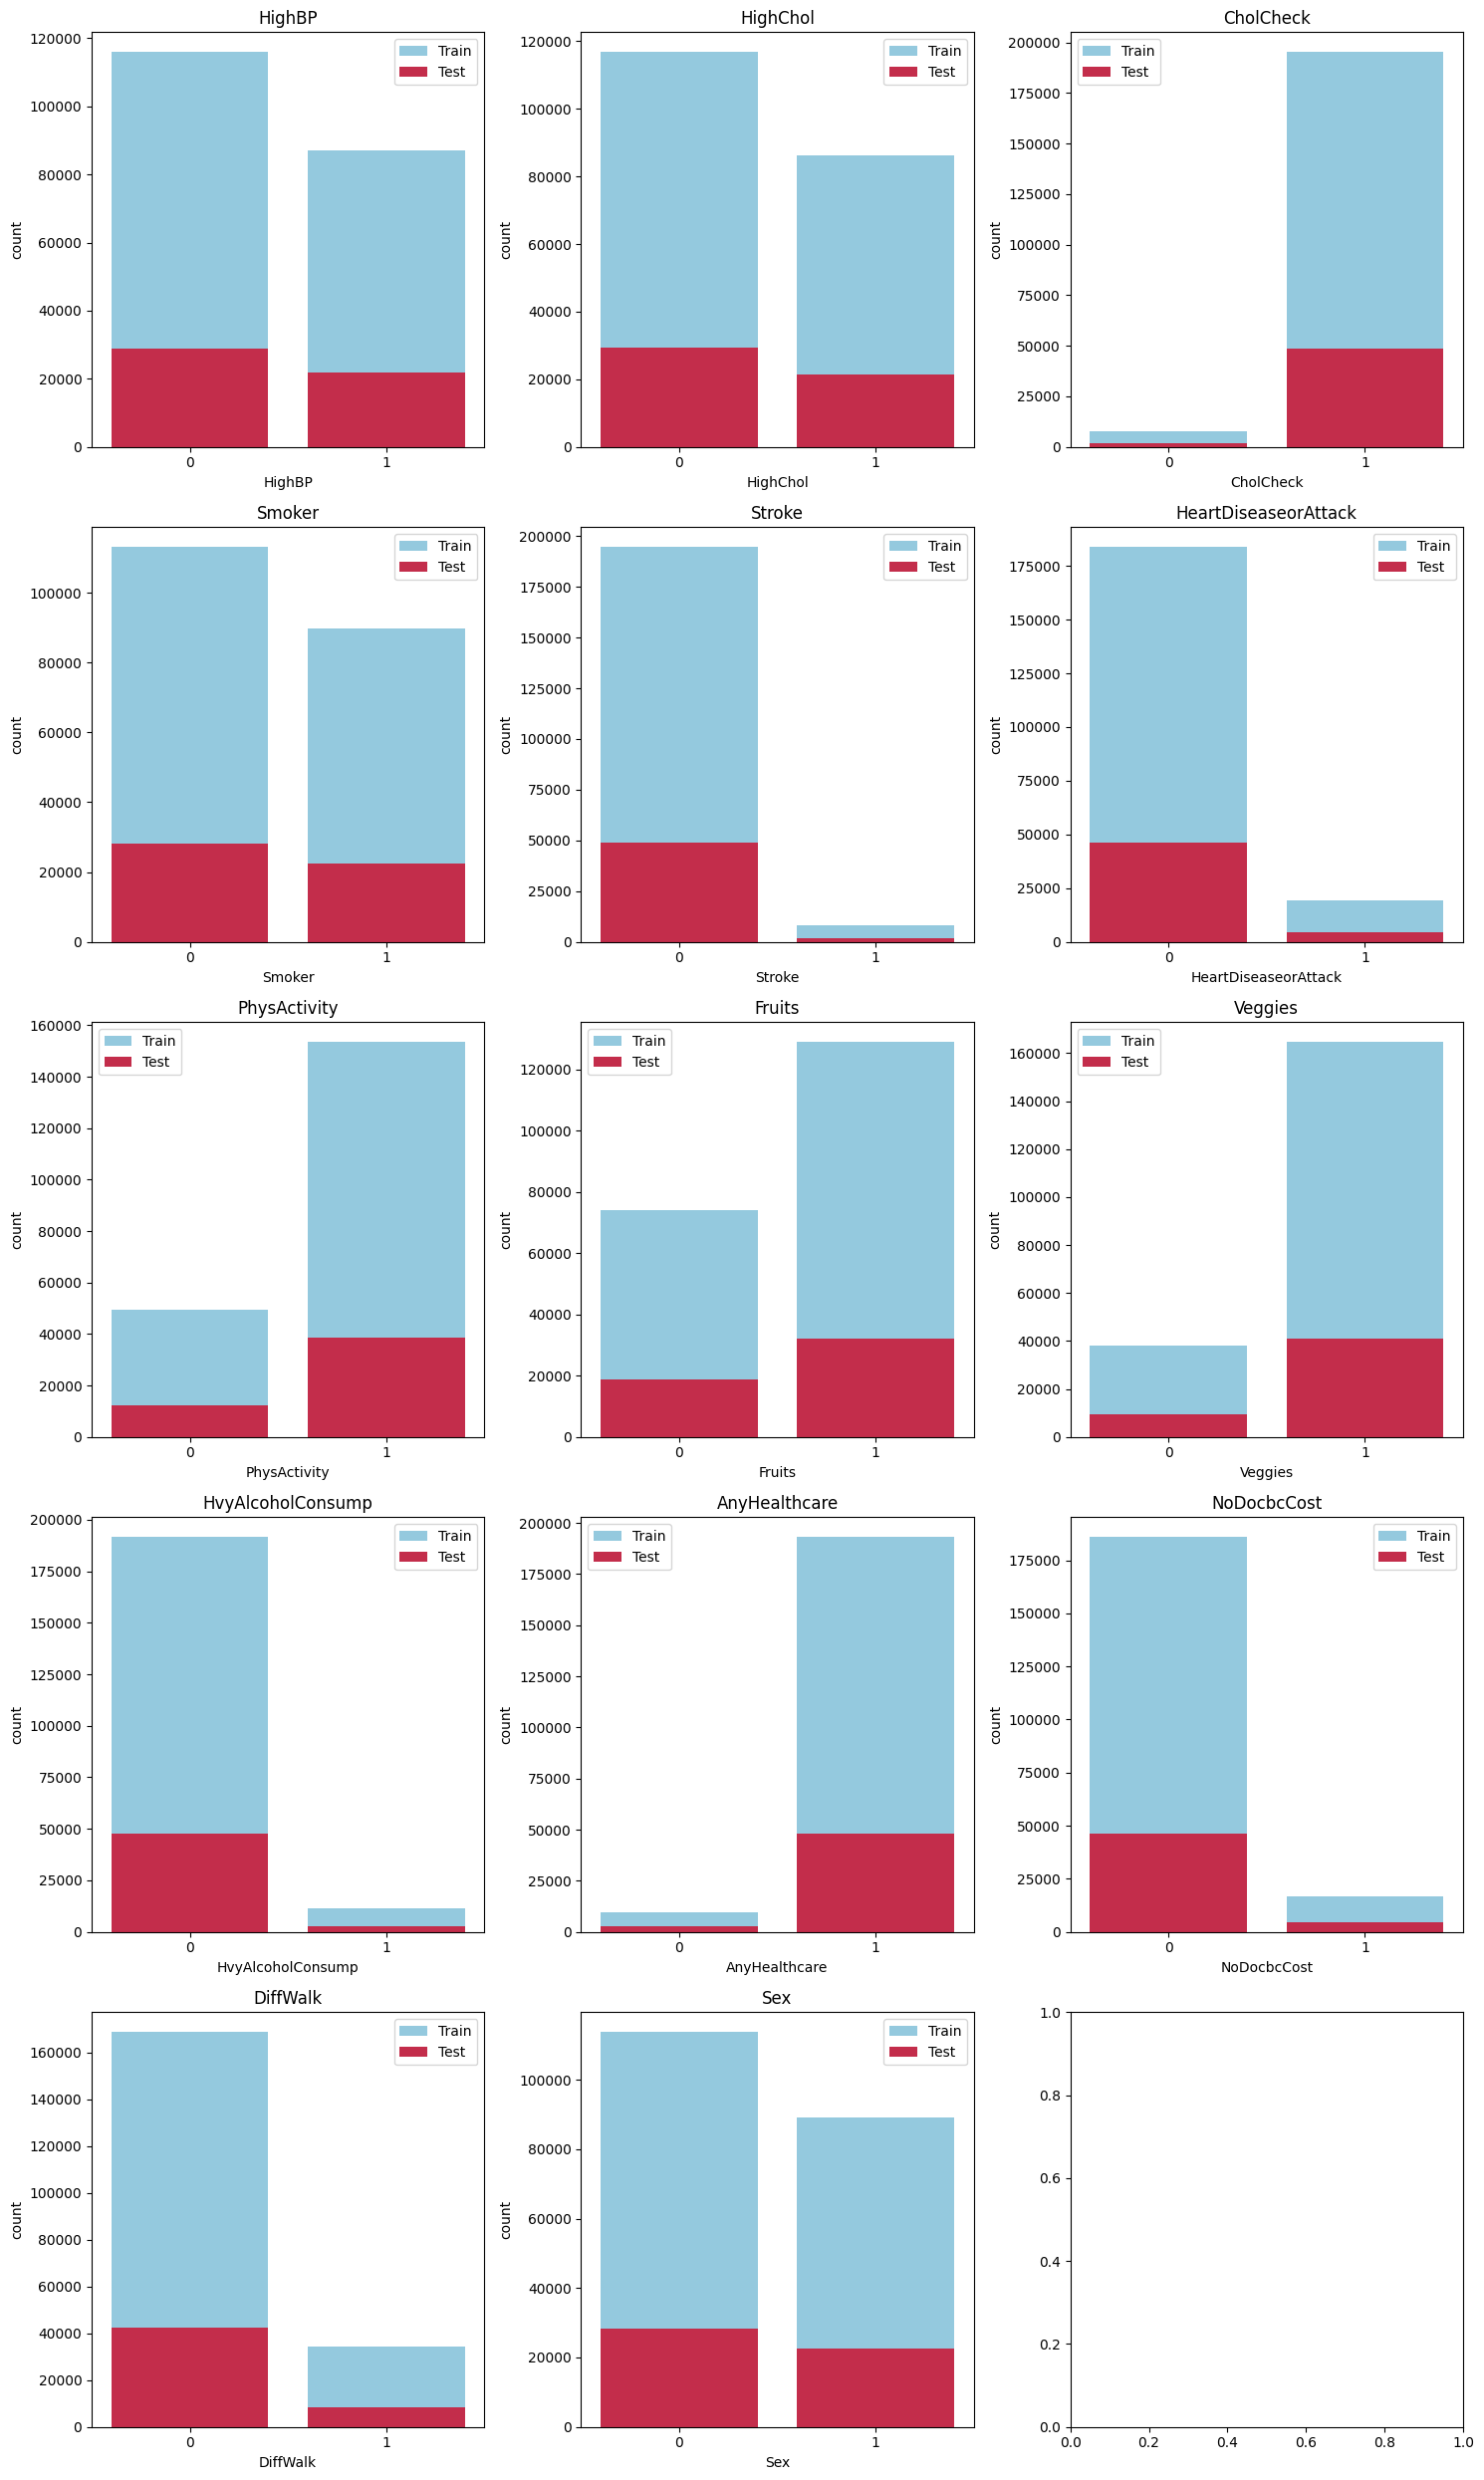

In [93]:
categoricals_features = [col for col in df_train.columns if col not in numerical_features]

# Calculate the number of rows needed for subplots
n_rows = len(categoricals_features) // 3
if len(categoricals_features) % 3:
    n_rows += 1

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

# Flatten the axes array and remove extra subplots
axes = axes.flatten()
for ax in axes[len(categoricals_features):]:
    fig.delaxes(ax)

for i, feature in enumerate(categoricals_features):
    if feature == 'Status':
        continue

    # Plot data for train dataset
    sns.countplot(data=df_train, x=feature, color='skyblue', label='Train', ax=axes[i])

    # Plot data for test dataset
    sns.countplot(data=df_test, x=feature, color='crimson', label='Test', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].legend()

plt.tight_layout()
plt.show()

fig.savefig('../images/categorical_columns_distribution.png')

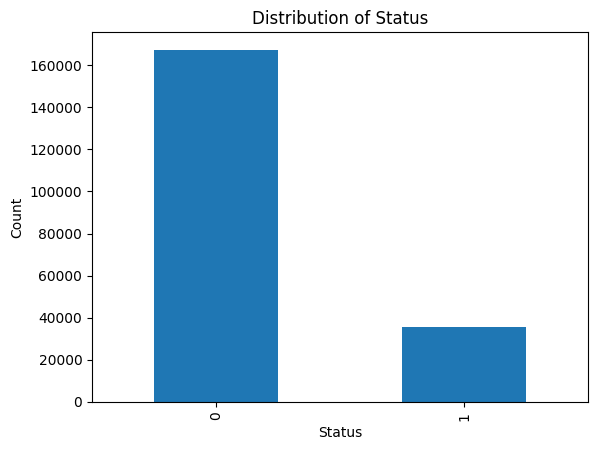

In [94]:
df_train['Status'].value_counts().plot(kind='bar')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')

plt.savefig('../images/distribution_status.png')
plt.show()

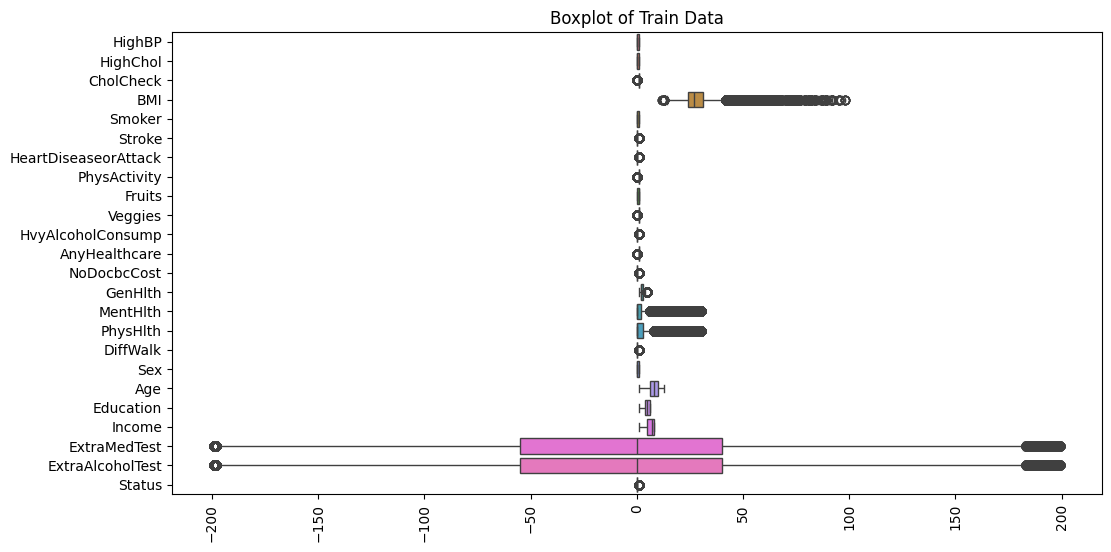

In [95]:
# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, orient='h')
plt.title('Boxplot of Train Data')
plt.xticks(rotation=90)
plt.savefig('../images/boxplot_train.png')
plt.show()

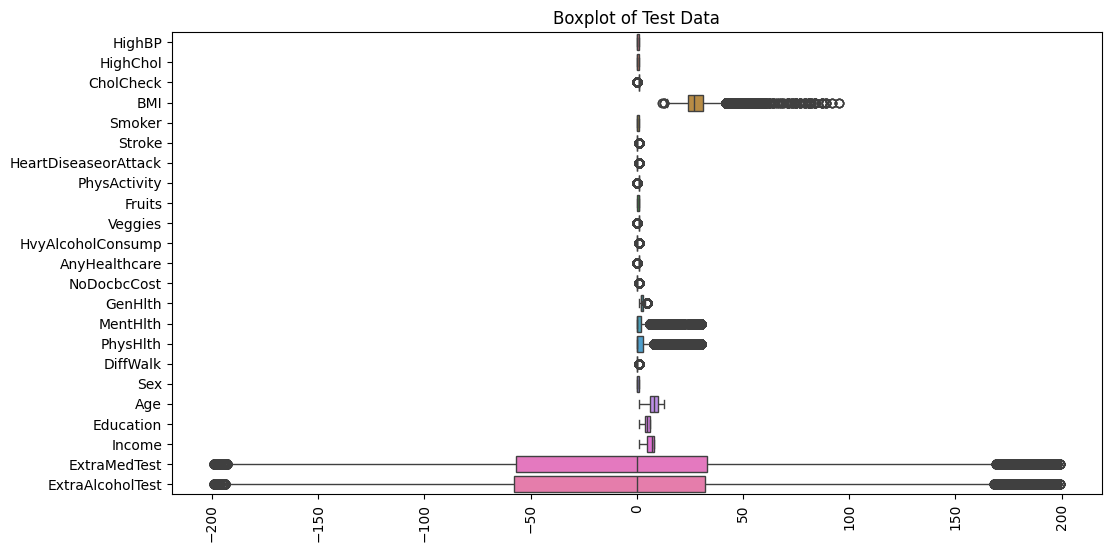

In [96]:
# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_test, orient='h')
plt.title('Boxplot of Test Data')
plt.xticks(rotation=90)
plt.savefig('../images/boxplot_test.png')
plt.show()

We can see that train dataset and test dataset has very similiar data distribution. But the amount of patients without diabetes is 4 times larger than the patients with diabetes in df_train so we will have to do oversampling later.

Which mean, for now, we can confidently say that the model trained on our dataset will perform well on the test dataset with patients that does not have diabetes


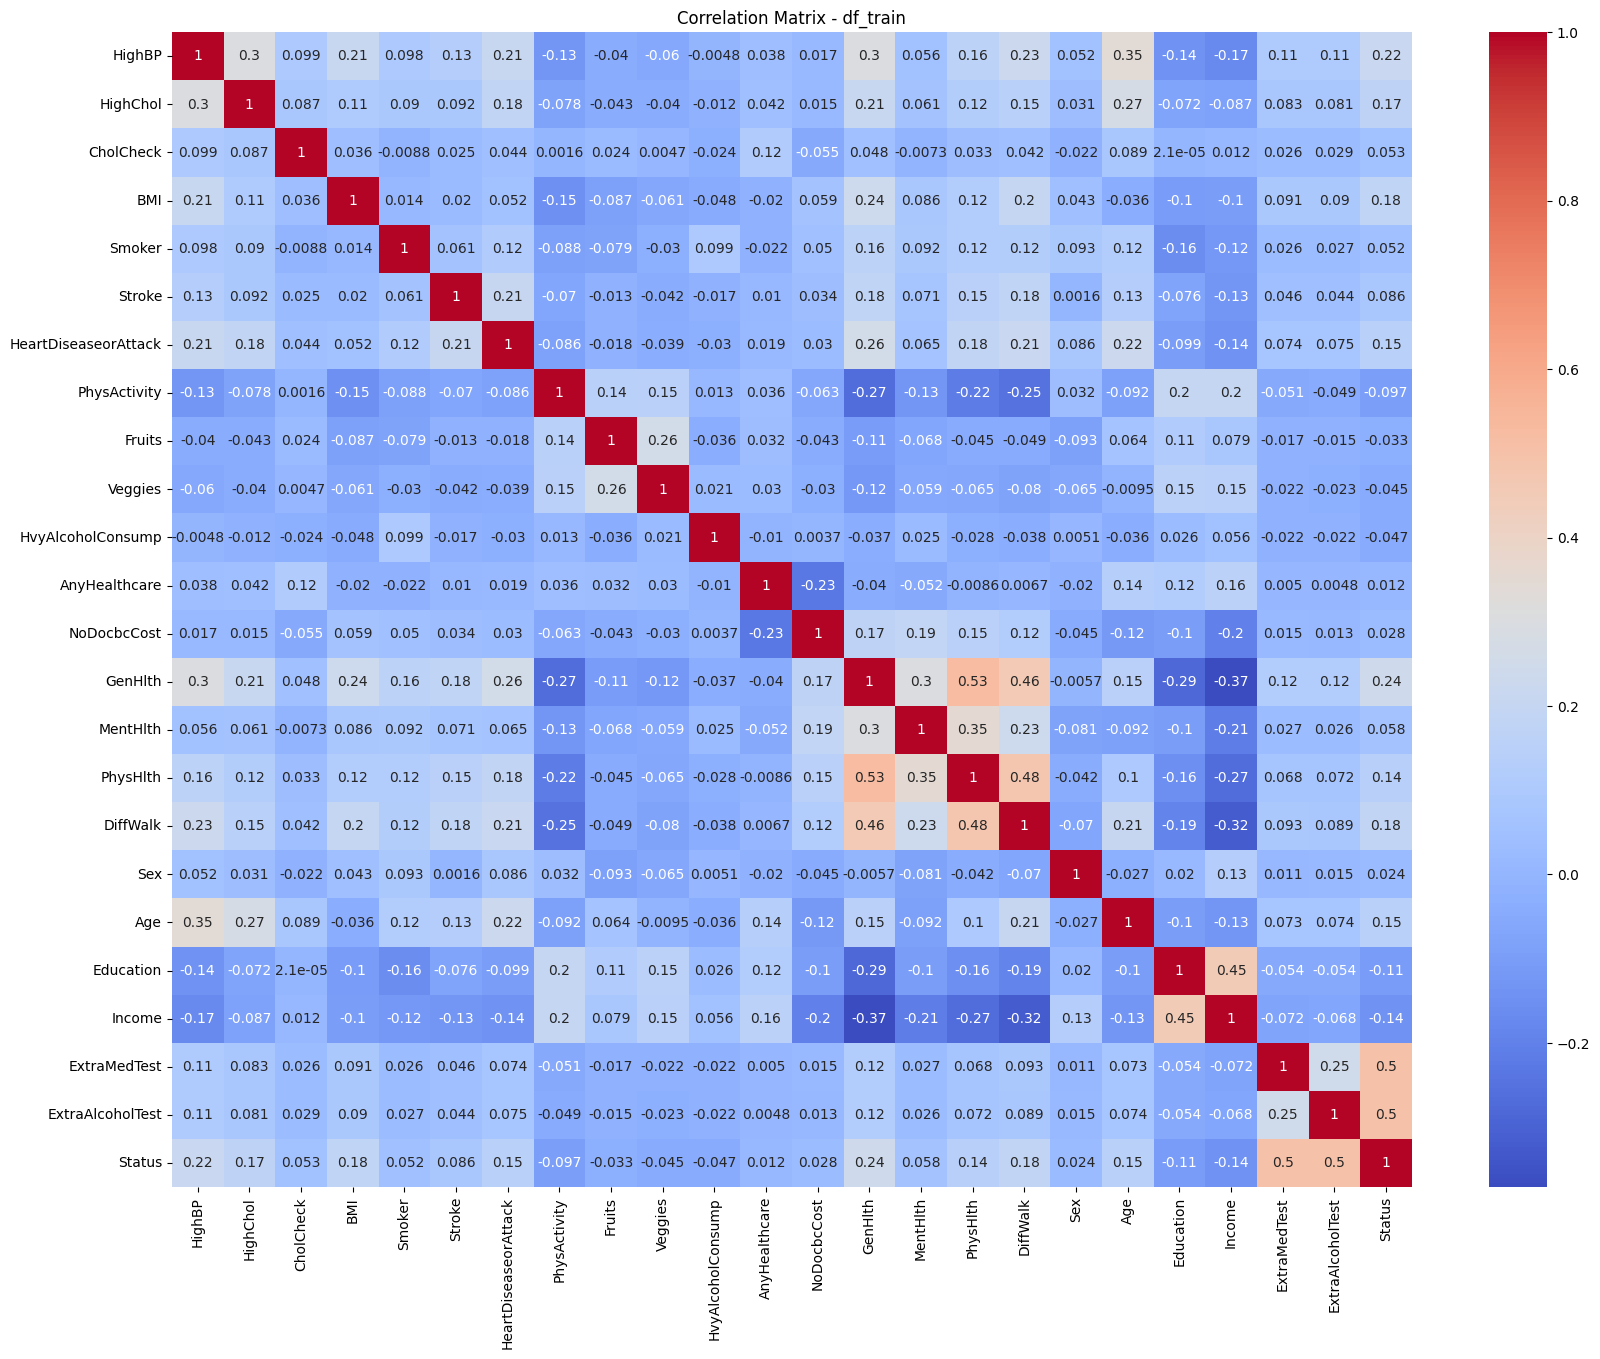

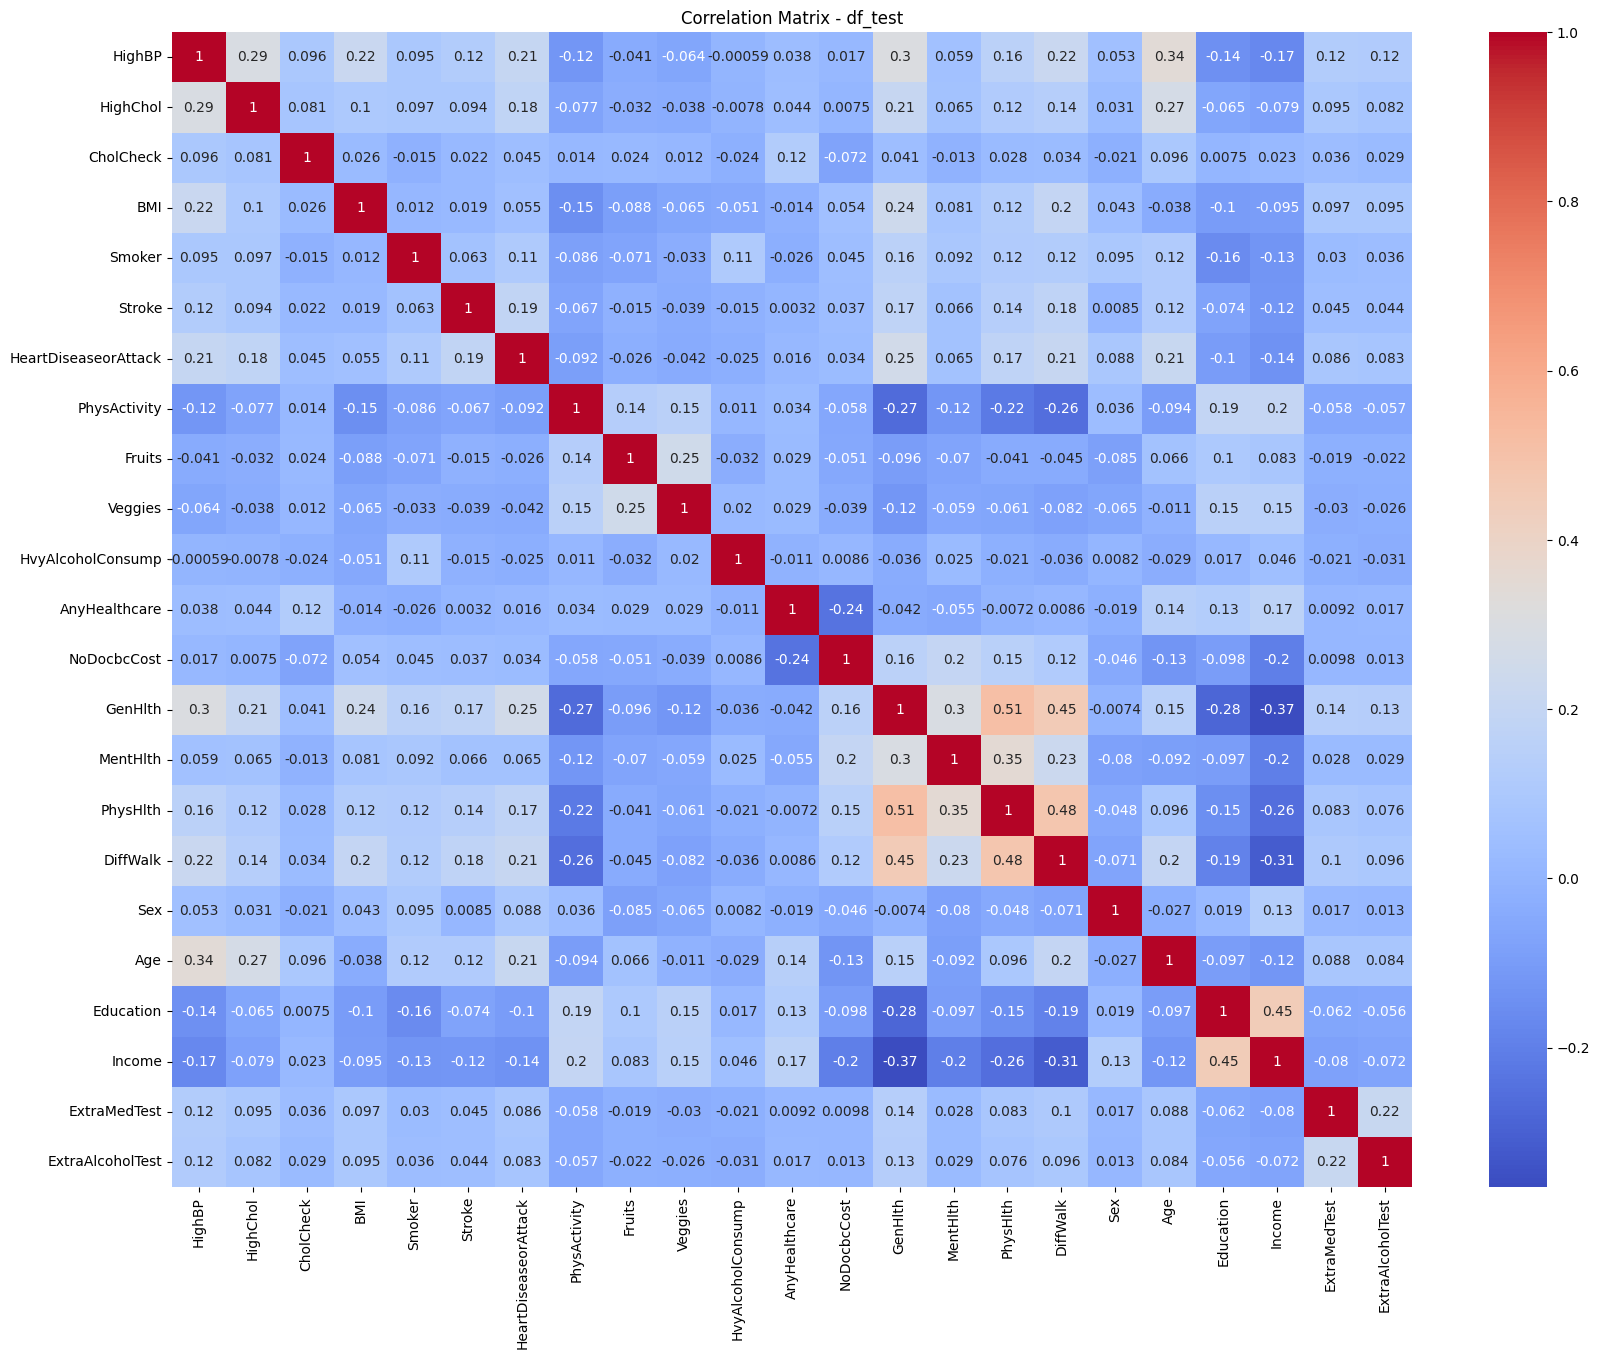

In [97]:
# Create correlation matrix for df_train
corr_train = df_train.corr()

# Plot correlation matrix for df_train
plt.figure(figsize=(20, 15))
sns.heatmap(corr_train, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - df_train')
plt.savefig('../images/correlation_maxtrix_train.png')
plt.show()

# Create correlation matrix for df_test
corr_test = df_test.corr()

# Plot correlation matrix for df_test
plt.figure(figsize=(20, 15))
sns.heatmap(corr_test, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - df_test')
plt.savefig('../images/correlation_maxtrix_test.png')
plt.show()

Based on the correlation matrices:

- There are minus values but even with a negative correlation, a feature can still be useful for prediction as:

 A positive correlation coefficient (closer to +1) indicates that as the value in one variable increases, the value in the other variable tends to increase as well.
 
 A negative correlation coefficient (closer to -1) indicates that as the value in one variable increases, the value in the other variable tends to decrease.  

- ExtraMedTest and ExtraAlcoholTest are important since the number of correlation coefficient between them and Status are high (0.5) meaning these features are expected to have significant weight in our model.

But based on the dataset [description](../data/code_book.txt), ExtraMedTest and ExtraAlcoholTest all have a range of (-100, 100). We will have to investigate more.

In [48]:
# Specify the same range for ExtraMedTest and ExtraAlcoholTest
lower_bound = -100
upper_bound = 100

# Check for values outside the specified range for both ExtraMedTest and ExtraAlcoholTest in df_train
out_of_range_both_train = df_train[(df_train['ExtraMedTest'] < lower_bound) | (df_train['ExtraMedTest'] > upper_bound) | 
                                   (df_train['ExtraAlcoholTest'] < lower_bound) | (df_train['ExtraAlcoholTest'] > upper_bound)]

# Check for values outside the specified range for both ExtraMedTest and ExtraAlcoholTest in df_test
out_of_range_both_test = df_test[(df_test['ExtraMedTest'] < lower_bound) | (df_test['ExtraMedTest'] > upper_bound) | 
                                 (df_test['ExtraAlcoholTest'] < lower_bound) | (df_test['ExtraAlcoholTest'] > upper_bound)]

In [49]:
total_rows_train = len(df_train)
total_rows_test = len(df_test)

# Calculate the percentage of rows with at least one feature out of range or both in df_train and df_test
percent_out_of_range_train = (len(out_of_range_both_train) / total_rows_train) * 100
percent_out_of_range_test = (len(out_of_range_both_test) / total_rows_test) * 100

print("Number of rows with at least one feature out of range or both in df_train:", len(out_of_range_both_train), 'Percent: {:.2f}%'.format(percent_out_of_range_train))
print("Number of rows with at least one feature out of range or both in df_test:", len(out_of_range_both_test), 'Percent: {:.2f}%'.format(percent_out_of_range_test))

Number of rows with at least one feature out of range or both in df_train: 54236 Percent: 26.72%
Number of rows with at least one feature out of range or both in df_test: 13303 Percent: 26.22%


In [50]:
print(f"'ExtraMedTest Min'\n{df_train['ExtraMedTest'].min()}")
print(f"'ExtraMedTest Max'\n{df_train['ExtraMedTest'].max()}")
print(f"'ExtraAlcoholTest Min'\n{df_train['ExtraMedTest'].min()}")
print(f"'ExtraAlcoholTest Max'\n{df_train['ExtraMedTest'].max()}")


'ExtraMedTest Min'
-199
'ExtraMedTest Max'
199
'ExtraAlcoholTest Min'
-199
'ExtraAlcoholTest Max'
199


Since the amount of data that has at least ExtraMedTest or ExtraAlcoholTest are substantial (over 1/4 of both dataset). I will use the range based on our dataset which is (-199, 199)

In [51]:
outliers = {}
for col in numerical_features:
    # Calculate IQR
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers (values below lower bound or above upper bound)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_outlier = (df_train[col] < lower_bound) | (df_train[col] > upper_bound)
    
    # Store outliers in a dictionary and print the total number of outliers
    outliers[col] = df_train[is_outlier]
    print(f"Column {col} has {outliers[col].shape[0]} outliers")

Column BMI has 7859 outliers
Column GenHlth has 9790 outliers
Column MentHlth has 29056 outliers
Column PhysHlth has 32909 outliers
Column Age has 0 outliers
Column Education has 0 outliers
Column Income has 0 outliers
Column ExtraMedTest has 2002 outliers
Column ExtraAlcoholTest has 1899 outliers


We will have to handle outliers later since there are many outliers in our dataset. 

In [52]:
print(f"Train data min\n{df_train.min()}")

Train data min
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
Status                    0
dtype: int64


In [53]:
print(f"\nTest data min\n{df_test.min()}")


Test data min
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
dtype: int64


Since all the features that cannot contain 0 value has minumum value > 0, there are no need to deal with 0 values

<!-- df_train.to_csv("../data/cleaned_train.csv", index=False)
df_test.to_csv("../data/cleaned_test.csv", index=False) -->

In [54]:
df_train.to_csv("../data/cleaned_train.csv", index=False)
df_test.to_csv("../data/cleaned_test.csv", index=False)